In [1]:
#calcuration libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv
import os
import codecs
import time
from natsort import natsorted
%matplotlib inline

In [2]:
# Material properties for Ethylen Glycol
A = 2.0148;
B = 4.50E-3;
def cp(T):
    cp = (A + B * (T+273.15));
    return cp
def cp_K(T):
    cp_K = A + B * (T);
    cp_K =  cp_K *1000;##???
    return cp_K
C = 0.2134;
D = 6.071E-4;
def Lambda(T):
    Lambda = C + D * (T+273.15);
    return Lambda
def Lambda_K(T):
    Lambda_K = C + D * (T);
    return Lambda_K
E = 1.1001E-4;
F = 325.85;
G = -207.30;
def mu(T):
    mu = E * np.exp( F / ( (T+273.15) + G) );
    return mu
def mu_K(T):
    mu_K = E * np.exp( F / ( (T) + G) );
    return mu_K
H = 1268.28;
I = -0.66;
def rho(T):
    rho = H + I * (T+273.15);
    return rho
def rho_K(T):
    rho_K = H + I * (T);
    return rho_K
def nu(T):
    nu = mu(T)/rho(T);
    return nu
def nu_K(T):
    nu_K = mu_K(T)/rho_K(T);
    return nu
def Pr(T):
    Pr = ( mu(T) * cp(T) * 1000 ) / Lambda(T);
    return Pr
def Pr_K(T):
    Pr_K = ( mu_K(T) * cp_K(T)) / Lambda_K(T);
    return Pr

# conduction equation for inner wall temperatuer 110-115
#Lambda_K = 0.16
DeltaK = 0.065E-3
Lambda_N = 20#!!!!!!!!!!!!!!!!!!!!!!!!
Lambda_C = 0.16 #thermal conductivity[W/mK] of capton tape
Lambda_iso = 0.055 #thermal conductivity[W/mK] of glass wool, outer isolation
riso = 0.05 #thickness of isolation
#temperature distribution in pipe(ri << r << ra)
def T1(r,qv,qzu,TN,Ta):
    T1 = (qzu/(2*Lambda_N)*ra**2)*(0.5-0.5*(r/ra)**2+np.log(r/ra)) + Ta - qv/Lambda_N*(ra+DeltaK)*(Lambda_N/Lambda_C*np.log(ra/(ra+DeltaK))+np.log(r/ra))
    return T1
#temperature distribution in capton tape(ra << r << ra+DeltaK)
def T2(r,qv,Ta):
    T2 = - qv/Lambda_C*(ra+DeltaK)*np.log(r/(ra+DeltaK)) + Ta
    return T2

#Experimental Facilities
di=12E-3
da=15E-3
ri = di/2
ra = da/2
disoa = 90E-3
L=2
V=(da**2-di**2)*np.pi/4*L
Ageo_MS = di*np.pi*L #円菅内部の試験部表面積
Ugeo_MS = di*np.pi #円菅内面積
Ageo_quer = di**2*np.pi/4

#PT100 position
#x_pos_TPt100_old = 
x_pos_TPt100_new =      [0.030, 2.400, 2.600, 2.800, 3.000, 3.000, 3.140, 5.500]
x_pos_TPt100_new_tmp =  [2.400, 2.600, 2.800, 3.000, 3.140]
TPT100_new_tmp =        [0,0,0,0,0]
xTin  = 0.03
xTout = 5.50
x_MS_in = 1.2
x_MS_out = 3.2

In [3]:
filename_list = []
T_in_list = []
T_out_list = []
Tw_list = []
Tm_list = []
mdot_list = []
qw_list = []
Re_m_list = []
Re_w_list = []
ReTau_list = []
Pr_m_list = []
Pr_w_list = []
NuMessung_list = []
cf_M_list = []
delta_NuMessung_list = []
delta_cf_M_list = []
df_list_all = []

mu_m_list = []
mu_w_list = []

I_MS_list = []

Nu_turb_Gni4Tau_list = []

#Data 07082019A
filename_07082019A_list = []
T_in_07082019A_list = []
T_out_07082019A_list = []
Tw_07082019A_list = []
Tm_07082019A_list = []
mdot_07082019A_list = []
qw_07082019A_list = []
Re_m_07082019A_list = []
Re_w_07082019A_list = []
ReTau_07082019A_list = []
Pr_m_07082019A_list = []
Pr_w_07082019A_list = []
NuMessung_07082019A_list = []
cf_M_07082019A_list = []
delta_NuMessung_07082019A_list = []
delta_cf_M_07082019A_list = []
#Data 07082019B
filename_07082019B_list = []
T_in_07082019B_list = []
T_out_07082019B_list = []
Tw_07082019B_list = []
Tm_07082019B_list = []
mdot_07082019B_list = []
qw_07082019B_list = []
Re_m_07082019B_list = []
Re_w_07082019B_list = []
ReTau_07082019B_list = []
Pr_m_07082019B_list = []
Pr_w_07082019B_list = []
NuMessung_07082019B_list = []
cf_M_07082019B_list = []
delta_NuMessung_07082019B_list = []
delta_cf_M_07082019B_list = []

#Data 08082019A
filename_08082019A_list = []
T_in_08082019A_list = []
T_out_08082019A_list = []
Tw_08082019A_list = []
Tm_08082019A_list = []
mdot_08082019A_list = []
qw_08082019A_list = []
Re_m_08082019A_list = []
Re_w_08082019A_list = []
ReTau_08082019A_list = []
Pr_m_08082019A_list = []
Pr_w_08082019A_list = []
NuMessung_08082019A_list = []
cf_M_08082019A_list = []
delta_NuMessung_08082019A_list = []
delta_cf_M_08082019A_list = []
#Data 08082019B
filename_08082019B_list = []
T_in_08082019B_list = []
T_out_08082019B_list = []
Tw_08082019B_list = []
Tm_08082019B_list = []
mdot_08082019B_list = []
qw_08082019B_list = []
Re_m_08082019B_list = []
Re_w_08082019B_list = []
ReTau_08082019B_list = []
Pr_m_08082019B_list = []
Pr_w_08082019B_list = []
NuMessung_08082019B_list = []
cf_M_08082019B_list = []
delta_NuMessung_08082019B_list = []
delta_cf_M_08082019B_list = []

#Data 13082019A
filename_13082019A_list = []
T_in_13082019A_list = []
T_out_13082019A_list = []
Tw_13082019A_list = []
Tm_13082019A_list = []
mdot_13082019A_list = []
qw_13082019A_list = []
Re_m_13082019A_list = []
Re_w_13082019A_list = []
ReTau_13082019A_list = []
Pr_m_13082019A_list = []
Pr_w_13082019A_list = []
NuMessung_13082019A_list = []
cf_M_13082019A_list = []
delta_NuMessung_13082019A_list = []
delta_cf_M_13082019A_list = []

#Data 13082019B
filename_13082019B_list = []
T_in_13082019B_list = []
T_out_13082019B_list = []
Tw_13082019B_list = []
Tm_13082019B_list = []
mdot_13082019B_list = []
qw_13082019B_list = []
Re_m_13082019B_list = []
Re_w_13082019B_list = []
ReTau_13082019B_list = []
Pr_m_13082019B_list = []
Pr_w_13082019B_list = []
NuMessung_13082019B_list = []
cf_M_13082019B_list = []
delta_NuMessung_13082019B_list = []
delta_cf_M_13082019B_list = []

#Data 13082019C
filename_13082019C_list = []
T_in_13082019C_list = []
T_out_13082019C_list = []
Tw_13082019C_list = []
Tm_13082019C_list = []
mdot_13082019C_list = []
qw_13082019C_list = []
Re_m_13082019C_list = []
Re_w_13082019C_list = []
ReTau_13082019C_list = []
Pr_m_13082019C_list = []
Pr_w_13082019C_list = []
NuMessung_13082019C_list = []
cf_M_13082019C_list = []
delta_NuMessung_13082019C_list = []
delta_cf_M_13082019C_list = []


#Data 14082019A
filename_14082019A_list = []
T_in_14082019A_list = []
T_out_14082019A_list = []
Tw_14082019A_list = []
Tm_14082019A_list = []
mdot_14082019A_list = []
qw_14082019A_list = []
Re_m_14082019A_list = []
Re_w_14082019A_list = []
ReTau_14082019A_list = []
Pr_m_14082019A_list = []
Pr_w_14082019A_list = []
NuMessung_14082019A_list = []
cf_M_14082019A_list = []
delta_NuMessung_14082019A_list = []
delta_cf_M_14082019A_list = []

#Data 14082019B
filename_14082019B_list = []
T_in_14082019B_list = []
T_out_14082019B_list = []
Tw_14082019B_list = []
Tm_14082019B_list = []
mdot_14082019B_list = []
qw_14082019B_list = []
Re_m_14082019B_list = []
Re_w_14082019B_list = []
ReTau_14082019B_list = []
Pr_m_14082019B_list = []
Pr_w_14082019B_list = []
NuMessung_14082019B_list = []
cf_M_14082019B_list = []
delta_NuMessung_14082019B_list = []
delta_cf_M_14082019B_list = []

#Data 14082019C
filename_14082019C_list = []
T_in_14082019C_list = []
T_out_14082019C_list = []
Tw_14082019C_list = []
Tm_14082019C_list = []
mdot_14082019C_list = []
qw_14082019C_list = []
Re_m_14082019C_list = []
Re_w_14082019C_list = []
ReTau_14082019C_list = []
Pr_m_14082019C_list = []
Pr_w_14082019C_list = []
NuMessung_14082019C_list = []
cf_M_14082019C_list = []
delta_NuMessung_14082019C_list = []
delta_cf_M_14082019C_list = []

### read measurement data 6-115

In [4]:
where = './data/'

for fname in sorted(os.listdir(where)):
    filename = where + fname
    if filename == where + 'rubbish':
        continue
    elif filename == where + '.DS_Store':
        continue
    elif filename == where + '.DS_Store.txt':
        continue
    else:
        txt = codecs.open(filename, encoding ='cp1252')
        data = np.loadtxt(txt, skiprows = 1)
        Tsa = data[:,0] #Temperatur aussen: Ts_aussen / °C
        Tsi = data[:,1] #Temperatur innen: Ts innen / °C
        Ti = data[:,2] #Fluidtemperatur: T / °C
        m_dot_C1 = data[0,3] #Massenstrom: m_dot C1 / kg/h
        m_dot_C2 = data[0,4] #Massenstrom: m_dot C2 / kg/h
        Re_C1 = data[0,5] #Re C1 / -
        Re_C2 = data[0,6] #Re C2 / -
        v_C1 = data[0,7] #Geschwindigkeit: v C1 / m/s
        v_C2 = data[0,8] #Geschwindigkeit: v C2 / m/s
        U_MS = data[0,9] #Spannungsabfall Messstrecke: U_MS / V
        I_MS = data[0,10] #Strom Messstrecke: I_MS / A
        P_MS = data[0,11] #Leistung Messstrecke: P_MS / W
        q = data[0,12] #spzifische Leistung: q / W/m3
        P1 = data[0,13] #Druckmessung: P1 / Pa
        P2 = data[0,14] #Druckmessung: P2 / Pa
        dp = data[0,15] #Differenzdruck: dp / bar
        nu_Fluid = data[0,16] #kin. Viscositaet Fluid: nu / m2/s
        rho_Fluid = data[0,17] #Dichte Fluid: rho / kg/m3
        Lambda_Fluid = data[0,18] #Waermeleitfaehigkeit Fluid: lambda / W/mK
        cp_Fluid = data[0,19] #spez. Waermekapazitaet Fluid: cp /J/kgK
        Pr_Fluid = data[0,20] #Pr / -
        Lambda_Rohr = data[0,21] #Waermeleitfaehigkeit Rohr: lambda / W/mK
        Nu_Fluid = data[0,22] #Nu / -
        I1 = data[0,23] #Strom I / A
        U1 = data[0,24] #Spannung U / V
        dp_T1 = data[0,25] #Re_tau / - 関数名とtxtが合っていない？
        dp_T2 = data[0,26] #Re_tau_Pet / -　関数名とtxtが合っていない？
        dp_T3 = data[0,27] #dp Pet / Pa
        #Mittel (U*I) mean P / W
        Pm = data[0,28] #Mittel (U*I) mean P / W
        TPT100_a_old = data[:5,29]#PT100 T aussen(5 value)
        TPT100_i_old = data[:5,30]#PT100 T innen(5 value)
        TPT100_m_old = data[:5,31]#PT100 T mittel(5 value)
        TPT100_a_new = data[:8,38]#!!!!!!!!!!!!!
        TPT100_i_new = data[:8,39]
        TPT100_m_new = data[:8,40]
        NuPt100 = data[0,32] #Nu Pt100
        NuQm = data[0,33] #Nu Qm
        # zeta computation Einlesen
        ZRem100 = data[0,34] #zeta Re
        Zzeta100 = data[0,35] #zeta
        Zqm100 = data[0,36] #zeta qw
        TPT100_T5 = data[0,37] #PT100 T5
        
        TPT100_out = TPT100_a_new
        TPT100_in  = TPT100_i_new
        TPT100_mean= TPT100_m_new
        TPT100_new = TPT100_i_new
        Tm_aus = TPT100_new[7]
        Tm = Tm_aus
        
        # iteration to update the temperatuer dependent material properties --> new wall temperature 205-339
        # first loop doesnt include dq heat loss.
        for i in range(2):
            Tw = TPT100_new[6]
            T_iso = Ti[1]
            T_inf = Ti[6]

            Pr_w = Pr(Tw)
            Pr_w     = Pr(Tw)
            rho_w    = rho(Tw)
            nu_w     = nu(Tw)
            mu_w     = nu_w * rho_w
            cp_w     = cp(Tw)
            Lambda_w = Lambda(Tw)
            Pr_m     = Pr(Tm)
            rho_m    = rho(Tm)
            nu_m     = nu(Tm)
            mu_m     = nu_m * rho_m
            cp_m     = cp(Tm)
            Lambda_m = Lambda(Tm)
            
            dqhldT = 1
            zeta_mischer = 32.46
            Thl = (Tw + Tm)*0.5
            qhl = dqhldT * (Thl - T_iso)
            qhlm2 = qhl / (da*np.pi*5.45)
            Re_m = Re_C1
            Lambda_Pet = (1.8*np.log10(Re_m)-1.5)**(-2)
            
            #Specific heat capasity, cp mean
            T_in = TPT100_new[0] + 273.15
            T_out = TPT100_new[7] + 273.15
            Ac = 2.0148
            Bc = 4.50E-3
            cpm = (Ac*(T_out-T_in)+Bc/2*(T_out**2-T_in**2))/(T_out-T_in)*1000 #Eq(2.108)
            Wmean = Re_m*nu_m/di #velocisty
            mdot = m_dot_C1/3600
            
            #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            #x_pos_TPt100_new_tmp[0] = x_pos_TPt100_new[1]
            #x_pos_TPt100_new_tmp[1] = x_pos_TPt100_new[2]
            #x_pos_TPt100_new_tmp[2] = x_pos_TPt100_new[3]
            #x_pos_TPt100_new_tmp[3] = 0.5 * (x_pos_TPt100_new[4] + x_pos_TPt100_new[5])
            #x_pos_TPt100_new_tmp[4] = x_pos_TPt100_new[6]
            
            TPT100_new_tmp[0] = TPT100_new[1]
            TPT100_new_tmp[1] = TPT100_new[2]
            TPT100_new_tmp[2] = TPT100_new[3]
            TPT100_new_tmp[3] = 0.5 * (TPT100_new[4] + TPT100_new[5])
            TPT100_new_tmp[4] = TPT100_new[6]
            
            fit = np.polyfit(x_pos_TPt100_new_tmp, TPT100_new_tmp,1)
            gradT_PT100 = fit[0]
            Q_Pt100 = gradT_PT100*mdot*cpm*L
            qUI = P_MS/Ageo_MS
            dqw2 = (Lambda_Pet*(5.45-2.92)/di + zeta_mischer) * rho_m * Wmean**2 /2 * Wmean * Ageo_quer - qhl*(5.45-2.53)/5.45
            
            Qin_out = mdot*cpm*(T_out-T_in)
            dQ = Qin_out-P_MS
            gradT = (Qin_out/L) / (mdot * cpm )
            dTm = dqw2/(mdot*cpm)
            SA_Tm = gradT*(x_MS_out-x_pos_TPt100_new[6])
            Tm_aus = TPT100_new[7] - dTm
            Tm = Tm_aus - SA_Tm
            
            qw = Qin_out/ Ageo_MS
            if(Qin_out>0):
                qvA=qhlm2
                #print('qvA=qhlm2')
            else:
                qvA=0
                #print('qvA=0')
            
            Pr_w     = Pr(Tw)
            rho_w    = rho(Tw)
            nu_w     = nu(Tw)
            mu_w     = nu_w * rho_w
            cp_w     = cp(Tw)
            Lambda_w = Lambda(Tw)
            Pr_m     = Pr(Tm)
            rho_m    = rho(Tm)
            nu_m     = nu(Tm)
            mu_m     = nu_m * rho_m
            cp_m     = cp(Tm)
            Lambda_m = Lambda(Tm)
            
            #P_spez_m2 = P_MS/A;
            P=Pm
            P=P_MS
            #Reynolds number[-]
            Re_m = m_dot_C1/3600*4/(nu_m*rho_m*di*np.pi)
            Re_w = m_dot_C1/3600*4/(nu_w*rho_m*di*np.pi)
            
            #Wall temperature calibration
            qVol = Qin_out / V
            Tw = T1(ri,qvA,qVol,TPT100_a_new[6], TPT100_a_new[6])
            Tw_SA6 = T1(ri,qvA,qVol, TPT100_a_new[5], TPT100_a_new[5])
            Tw_SA5 = T1(ri,qvA,qVol, TPT100_a_new[4], TPT100_a_new[4])
            Tw_SA4 = T1(ri,qvA,qVol, TPT100_a_new[3], TPT100_a_new[3])
            Tw_SA3 = T1(ri,qvA,qVol, TPT100_a_new[2], TPT100_a_new[2])
            Tw_SA2 = T1(ri,qvA,qVol, TPT100_a_new[1], TPT100_a_new[1])
            Tw_SA1 = T1(ri,qvA,qVol, TPT100_a_new[0], TPT100_a_new[0])
            Tw_SA8 = T1(ri,qvA,qVol, TPT100_a_new[7], TPT100_a_new[7])
            TPT100_new[6] = Tw
            TPT100_new[0] = Tw_SA1
            TPT100_new[1] = Tw_SA2
            TPT100_new[2] = Tw_SA3
            TPT100_new[3] = Tw_SA4
            TPT100_new[4] = Tw_SA5
            TPT100_new[5] = Tw_SA6
            TPT100_new[7] = Tw_SA8
            
            Nu_QmdotCpDt_w = qw * di / (Lambda_w * (Tw-Tm ))
            NuMessung = Nu_QmdotCpDt_w
            tau_w = dp*di/(1*4)
            
            ###ADDDDDDDDDDD!!!!!!!!!
            Pr_w     = Pr(Tw)
            rho_w    = rho(Tw)
            nu_w     = nu(Tw)
            mu_w     = nu_w * rho_w
            cp_w     = cp(Tw)
            Lambda_w = Lambda(Tw)
            Pr_m     = Pr(Tm)
            rho_m    = rho(Tm)
            nu_m     = nu(Tm)
            mu_m     = nu_m * rho_m
            cp_m     = cp(Tm)
            Lambda_m = Lambda(Tm)
            
            w_tau=(tau_w/rho_m)**(1/2) #share velocity
            ReTau = w_tau*di/nu_w
            ###ADDDDDDDDDDD!!!!!!!!!
            Wmean = Re_m*nu_m/di
            cf_M = tau_w/(rho_m*Wmean**2/2) #Friction coefficient Eq(4.8)
        
        print(filename)
        #桁数は四捨五入ではなく、「丸め」であることに注意
        #print('Tin','{:.4f}'.format(T_in), 'Tout','{:.4f}'.format(T_out),'Tw', '{:.4f}'.format(Tw), 'Tm', '{:.4f}'.format(Tm))
        #print('mdot', '{:.5f}'.format(mdot))
        #print('qw', '{:.5e}'.format(qw))
        print("Re[-]",'{:.5e}'.format(Re_m),'{:.4f}'.format(ReTau))
        #print('Pr[-]','{:.2f}'.format(Pr_m),'{:.2f}'.format(Pr_w))
        #print('Nu','{:.4f}'.format(NuMessung))
        #print('cf_M','{:.10f}'.format(cf_M))
        
        # Measurement uncertainty
        #### absolute error
        T_e = 0.04#New PT100??????????????
        #mass flow rate [kg / s]
        mdot_e = 0.20E-3 * mdot
        #pressure[Pa]
        p_e = 0.35E-3 * dp #dpでいいの???????????
        #density [kg / m^3]
        rho_e = 0.66 * T_e
        #specific heat capasity [J / kg K]
        cp_e = 4.5 * T_e
        #thermal conductivity of fluid [W / m K]
        Lambda_e = 6.071e-4 * T_e
        
        #Uncertainty in each measurement influencing
        delta_mdot = (mdot_e / mdot)**2
        delta_cp = (cp_e/cp_m)**2 #cpm、cp_mどちら？
        delta_Lambda = (Lambda_e/Lambda_m)**2
        delta_T = (T_e/(T_in-Tm))**2 + ((T_e * (T_in-Tw)) / ((T_in-Tm)*(Tm-Tw)))**2 + (T_e/(Tm-Tw) )**2#T_outは影響しない？
        #Measurement uncertainty for NuMessung
        delta_NuMessung = (delta_mdot + delta_cp + delta_Lambda + delta_T)**(1/2) * NuMessung
        #Reduction of the uncertainty of the cp calibration is the most effective, in order to reduce the uncertainty of Nu.
        
        #Uncertainty in each measurement influencing
        delta_p = (p_e / dp)**2
        delta_rho = (rho_e / rho_m)**2
        #Measurement uncertainty for cf_M
        delta_cf_M = (delta_p + delta_rho + (2*delta_mdot))**(1/2) * cf_M
        #Reduction of the uncertainty of the p calibration is the most effective, in order to reduce the uncertainty of cf.
        
        xi_Pet4Tau = (1.8 * np.log10(Re_m) - 1.5)**(-2)#Petukhov
        Nu_turb_Gni4Tau = ((xi_Pet4Tau/8 * Re_m * Pr_m) / (1 + 12.7 * (xi_Pet4Tau/8)**0.5 * (Pr_m**(2/3) - 1))) *(Pr_m/Pr_w)**0.11
        Nu_turb_Gni4Tau_list.append(Nu_turb_Gni4Tau)
        #print(Nu_turb_Gni4Tau)
        
        #Nu_turb_Gni4Tau_list.append(Nu_turb_Gni4Tau)
        
        filename_list.append(filename)
        T_in_list.append(T_in)
        T_out_list.append(T_out)
        Tw_list.append(Tw)
        Tm_list.append(Tm)
        mdot_list.append(mdot)
        qw_list.append(qw)
        Re_m_list.append(Re_m)
        Re_w_list.append(Re_w)
        ReTau_list.append(ReTau)
        Pr_m_list.append(Pr_m)
        Pr_w_list.append(Pr_w)
        NuMessung_list.append(NuMessung)
        cf_M_list.append(cf_M)
        delta_NuMessung_list.append(delta_NuMessung)
        delta_cf_M_list.append(delta_cf_M) 
        
        mu_m_list.append(mu_m)
        mu_w_list.append(mu_w)
        
        
        I_MS_list.append(I_MS)
        #--------------------------------------------
        
        epoch = os.path.getmtime(filename)
        filename_day = time.strftime('%d%m%Y', time.localtime(epoch))
        filename_time = time.strftime('%H%M%S', time.localtime(epoch))
        #https://tonari-it.com/python-file-get-time-epoch/#toc5
        #print(filename_day)
        #print(filename_time)

        #Devide the day!!!!!!!!!
        if filename_day == '07082019':
            if '143900' <= filename_time <= '152000':
                T_in_07082019A_list.append(T_in)
                T_out_07082019A_list.append(T_out)
                Tw_07082019A_list.append(Tw)
                Tm_07082019A_list.append(Tm)
                mdot_07082019A_list.append(mdot)
                qw_07082019A_list.append(qw)
                Re_m_07082019A_list.append(Re_m)
                Re_w_07082019A_list.append(Re_w)
                ReTau_07082019A_list.append(ReTau)
                Pr_m_07082019A_list.append(Pr_m)
                Pr_w_07082019A_list.append(Pr_w)
                NuMessung_07082019A_list.append(NuMessung)
                cf_M_07082019A_list.append(cf_M)
                delta_NuMessung_07082019A_list.append(delta_NuMessung)
                delta_cf_M_07082019A_list.append(delta_cf_M)
                print('07082019A')  
            elif '153000' <= filename_time <= '154000':
                T_in_07082019B_list.append(T_in)
                T_out_07082019B_list.append(T_out)
                Tw_07082019B_list.append(Tw)
                Tm_07082019B_list.append(Tm)
                mdot_07082019B_list.append(mdot)
                qw_07082019B_list.append(qw)
                Re_m_07082019B_list.append(Re_m)
                Re_w_07082019B_list.append(Re_w)
                ReTau_07082019B_list.append(ReTau)
                Pr_m_07082019B_list.append(Pr_m)
                Pr_w_07082019B_list.append(Pr_w)
                NuMessung_07082019B_list.append(NuMessung)
                cf_M_07082019B_list.append(cf_M)
                delta_NuMessung_07082019B_list.append(delta_NuMessung)
                delta_cf_M_07082019B_list.append(delta_cf_M)
                print('07082019B') 
            else:
                print('data is missing')
        elif filename_day == '08082019':
            if '142100' <= filename_time <= '143000':
                T_in_08082019A_list.append(T_in)
                T_out_08082019A_list.append(T_out)
                Tw_08082019A_list.append(Tw)
                Tm_08082019A_list.append(Tm)
                mdot_08082019A_list.append(mdot)
                qw_08082019A_list.append(qw)
                Re_m_08082019A_list.append(Re_m)
                Re_w_08082019A_list.append(Re_w)
                ReTau_08082019A_list.append(ReTau)
                Pr_m_08082019A_list.append(Pr_m)
                Pr_w_08082019A_list.append(Pr_w)
                NuMessung_08082019A_list.append(NuMessung)
                cf_M_08082019A_list.append(cf_M)
                delta_NuMessung_08082019A_list.append(delta_NuMessung)
                delta_cf_M_08082019A_list.append(delta_cf_M)
                print('08082019A')
            elif '151900' <= filename_time <= '153000':
                T_in_08082019B_list.append(T_in)
                T_out_08082019B_list.append(T_out)
                Tw_08082019B_list.append(Tw)
                Tm_08082019B_list.append(Tm)
                mdot_08082019B_list.append(mdot)
                qw_08082019B_list.append(qw)
                Re_m_08082019B_list.append(Re_m)
                Re_w_08082019B_list.append(Re_w)
                ReTau_08082019B_list.append(ReTau)
                Pr_m_08082019B_list.append(Pr_m)
                Pr_w_08082019B_list.append(Pr_w)
                NuMessung_08082019B_list.append(NuMessung)
                cf_M_08082019B_list.append(cf_M)
                delta_NuMessung_08082019B_list.append(delta_NuMessung)
                delta_cf_M_08082019B_list.append(delta_cf_M)
                print('08082019B')
            else:
                print('data is missing')
                
        elif filename_day == '13082019':
            if '145500' <= filename_time <= '152700':
                T_in_13082019A_list.append(T_in)
                T_out_13082019A_list.append(T_out)
                Tw_13082019A_list.append(Tw)
                Tm_13082019A_list.append(Tm)
                mdot_13082019A_list.append(mdot)
                qw_13082019A_list.append(qw)
                Re_m_13082019A_list.append(Re_m)
                Re_w_13082019A_list.append(Re_w)
                ReTau_13082019A_list.append(ReTau)
                Pr_m_13082019A_list.append(Pr_m)
                Pr_w_13082019A_list.append(Pr_w)
                NuMessung_13082019A_list.append(NuMessung)
                cf_M_13082019A_list.append(cf_M)
                delta_NuMessung_13082019A_list.append(delta_NuMessung)
                delta_cf_M_13082019A_list.append(delta_cf_M)
                print('13082019A')
            elif '154100' <= filename_time <= '155800':
                T_in_13082019B_list.append(T_in)
                T_out_13082019B_list.append(T_out)
                Tw_13082019B_list.append(Tw)
                Tm_13082019B_list.append(Tm)
                mdot_13082019B_list.append(mdot)
                qw_13082019B_list.append(qw)
                Re_m_13082019B_list.append(Re_m)
                Re_w_13082019B_list.append(Re_w)
                ReTau_13082019B_list.append(ReTau)
                Pr_m_13082019B_list.append(Pr_m)
                Pr_w_13082019B_list.append(Pr_w)
                NuMessung_13082019B_list.append(NuMessung)
                cf_M_13082019B_list.append(cf_M)
                delta_NuMessung_13082019B_list.append(delta_NuMessung)
                delta_cf_M_13082019B_list.append(delta_cf_M)
                print('13082019B')
            elif '162200' <= filename_time <= '163400':
                T_in_13082019C_list.append(T_in)
                T_out_13082019C_list.append(T_out)
                Tw_13082019C_list.append(Tw)
                Tm_13082019C_list.append(Tm)
                mdot_13082019C_list.append(mdot)
                qw_13082019C_list.append(qw)
                Re_m_13082019C_list.append(Re_m)
                Re_w_13082019C_list.append(Re_w)
                ReTau_13082019C_list.append(ReTau)
                Pr_m_13082019C_list.append(Pr_m)
                Pr_w_13082019C_list.append(Pr_w)
                NuMessung_13082019C_list.append(NuMessung)
                cf_M_13082019C_list.append(cf_M)
                delta_NuMessung_13082019C_list.append(delta_NuMessung)
                delta_cf_M_13082019C_list.append(delta_cf_M)
                print('13082019C')
            else:
                print('data is missing')
        elif filename_day == '14082019':
            if '100200' <= filename_time <= '105500':
                T_in_14082019A_list.append(T_in)
                T_out_14082019A_list.append(T_out)
                Tw_14082019A_list.append(Tw)
                Tm_14082019A_list.append(Tm)
                mdot_14082019A_list.append(mdot)
                qw_14082019A_list.append(qw)
                Re_m_14082019A_list.append(Re_m)
                Re_w_14082019A_list.append(Re_w)
                ReTau_14082019A_list.append(ReTau)
                Pr_m_14082019A_list.append(Pr_m)
                Pr_w_14082019A_list.append(Pr_w)
                NuMessung_14082019A_list.append(NuMessung)
                cf_M_14082019A_list.append(cf_M)
                delta_NuMessung_14082019A_list.append(delta_NuMessung)
                delta_cf_M_14082019A_list.append(delta_cf_M)
                print('14082019A')
            elif '111200' <= filename_time <= '122300':
                T_in_14082019B_list.append(T_in)
                T_out_14082019B_list.append(T_out)
                Tw_14082019B_list.append(Tw)
                Tm_14082019B_list.append(Tm)
                mdot_14082019B_list.append(mdot)
                qw_14082019B_list.append(qw)
                Re_m_14082019B_list.append(Re_m)
                Re_w_14082019B_list.append(Re_w)
                ReTau_14082019B_list.append(ReTau)
                Pr_m_14082019B_list.append(Pr_m)
                Pr_w_14082019B_list.append(Pr_w)
                NuMessung_14082019B_list.append(NuMessung)
                cf_M_14082019B_list.append(cf_M)
                delta_NuMessung_14082019B_list.append(delta_NuMessung)
                delta_cf_M_14082019B_list.append(delta_cf_M)
                print('14082019B')
            elif '150400' <= filename_time <= '160000':
                T_in_14082019C_list.append(T_in)
                T_out_14082019C_list.append(T_out)
                Tw_14082019C_list.append(Tw)
                Tm_14082019C_list.append(Tm)
                mdot_14082019C_list.append(mdot)
                qw_14082019C_list.append(qw)
                Re_m_14082019C_list.append(Re_m)
                Re_w_14082019C_list.append(Re_w)
                ReTau_14082019C_list.append(ReTau)
                Pr_m_14082019C_list.append(Pr_m)
                Pr_w_14082019C_list.append(Pr_w)
                NuMessung_14082019C_list.append(NuMessung)
                cf_M_14082019C_list.append(cf_M)
                delta_NuMessung_14082019C_list.append(delta_NuMessung)
                delta_cf_M_14082019C_list.append(delta_cf_M)
                print('14082019C')
            else:
                print('data is missing')
        else:
            print('data is missing')
        print('------------------')

samples = 5
data07082019A_ave = [sum(T_in_07082019A_list)/samples, sum(T_out_07082019A_list)/samples, sum(Tw_07082019A_list)/samples, 
                     sum(Tm_07082019A_list)/samples,   sum(mdot_07082019A_list)/samples,  sum(qw_07082019A_list)/samples,
                     sum(Re_m_07082019A_list)/samples, sum(Re_w_07082019A_list)/samples,  sum(ReTau_07082019A_list)/samples,
                     sum(Pr_m_07082019A_list)/samples, sum(Pr_w_07082019A_list)/samples,  sum(NuMessung_07082019A_list)/samples,
                     sum(cf_M_07082019A_list)/samples, sum(delta_NuMessung_07082019A_list)/samples, sum(cf_M_07082019A_list)/samples,
                     sum(delta_NuMessung_07082019A_list)/samples,  sum(delta_cf_M_07082019A_list)/samples]
samples = 2
data07082019B_ave = [sum(T_in_07082019B_list)/samples, sum(T_out_07082019B_list)/samples, sum(Tw_07082019B_list)/samples, 
                     sum(Tm_07082019B_list)/samples,   sum(mdot_07082019B_list)/samples,  sum(qw_07082019B_list)/samples,
                     sum(Re_m_07082019B_list)/samples, sum(Re_w_07082019B_list)/samples,  sum(ReTau_07082019B_list)/samples,
                     sum(Pr_m_07082019B_list)/samples, sum(Pr_w_07082019B_list)/samples,  sum(NuMessung_07082019B_list)/samples,
                     sum(cf_M_07082019B_list)/samples, sum(delta_NuMessung_07082019B_list)/samples, sum(cf_M_07082019B_list)/samples,
                     sum(delta_NuMessung_07082019B_list)/samples,  sum(delta_cf_M_07082019B_list)/samples]

samples = 2
data08082019A_ave = [sum(T_in_08082019A_list)/samples, sum(T_out_08082019A_list)/samples, sum(Tw_08082019A_list)/samples, 
                     sum(Tm_08082019A_list)/samples,   sum(mdot_08082019A_list)/samples,  sum(qw_08082019A_list)/samples,
                     sum(Re_m_08082019A_list)/samples, sum(Re_w_08082019A_list)/samples,  sum(ReTau_08082019A_list)/samples,
                     sum(Pr_m_08082019A_list)/samples, sum(Pr_w_08082019A_list)/samples,  sum(NuMessung_08082019A_list)/samples,
                     sum(cf_M_08082019A_list)/samples, sum(delta_NuMessung_08082019A_list)/samples, sum(cf_M_08082019A_list)/samples,
                     sum(delta_NuMessung_08082019A_list)/samples,  sum(delta_cf_M_08082019A_list)/samples]
samples = 2
data08082019B_ave = [sum(T_in_08082019B_list)/samples, sum(T_out_08082019B_list)/samples, sum(Tw_08082019B_list)/samples, 
                     sum(Tm_08082019B_list)/samples,   sum(mdot_08082019B_list)/samples,  sum(qw_08082019B_list)/samples,
                     sum(Re_m_08082019B_list)/samples, sum(Re_w_08082019B_list)/samples,  sum(ReTau_08082019B_list)/samples,
                     sum(Pr_m_08082019B_list)/samples, sum(Pr_w_08082019B_list)/samples,  sum(NuMessung_08082019B_list)/samples,
                     sum(cf_M_08082019B_list)/samples, sum(delta_NuMessung_08082019B_list)/samples, sum(cf_M_08082019B_list)/samples,
                     sum(delta_NuMessung_08082019B_list)/samples,  sum(delta_cf_M_08082019B_list)/samples]


  
        
samples = 4
data13082019A_ave = [sum(T_in_13082019A_list)/samples, sum(T_out_13082019A_list)/samples, sum(Tw_13082019A_list)/samples, 
                     sum(Tm_13082019A_list)/samples,   sum(mdot_13082019A_list)/samples,  sum(qw_13082019A_list)/samples,
                     sum(Re_m_13082019A_list)/samples, sum(Re_w_13082019A_list)/samples,  sum(ReTau_13082019A_list)/samples,
                     sum(Pr_m_13082019A_list)/samples, sum(Pr_w_13082019A_list)/samples,  sum(NuMessung_13082019A_list)/samples,
                     sum(cf_M_13082019A_list)/samples, sum(delta_NuMessung_13082019A_list)/samples, sum(cf_M_13082019A_list)/samples,
                     sum(delta_NuMessung_13082019A_list)/samples,  sum(delta_cf_M_13082019A_list)/samples]

samples = 3
data13082019B_ave = [sum(T_in_13082019B_list)/samples, sum(T_out_13082019B_list)/samples, sum(Tw_13082019B_list)/samples, 
                     sum(Tm_13082019B_list)/samples,   sum(mdot_13082019B_list)/samples,  sum(qw_13082019B_list)/samples,
                     sum(Re_m_13082019B_list)/samples, sum(Re_w_13082019B_list)/samples,  sum(ReTau_13082019B_list)/samples,
                     sum(Pr_m_13082019B_list)/samples, sum(Pr_w_13082019B_list)/samples,  sum(NuMessung_13082019B_list)/samples,
                     sum(cf_M_13082019B_list)/samples, sum(delta_NuMessung_13082019B_list)/samples, sum(cf_M_13082019B_list)/samples,
                     sum(delta_NuMessung_13082019B_list)/samples,  sum(delta_cf_M_13082019B_list)/samples]

samples = 3
data13082019C_ave = [sum(T_in_13082019C_list)/samples, sum(T_out_13082019C_list)/samples, sum(Tw_13082019C_list)/samples, 
                     sum(Tm_13082019C_list)/samples,   sum(mdot_13082019C_list)/samples,  sum(qw_13082019C_list)/samples,
                     sum(Re_m_13082019C_list)/samples, sum(Re_w_13082019C_list)/samples,  sum(ReTau_13082019C_list)/samples,
                     sum(Pr_m_13082019C_list)/samples, sum(Pr_w_13082019C_list)/samples,  sum(NuMessung_13082019C_list)/samples,
                     sum(cf_M_13082019C_list)/samples, sum(delta_NuMessung_13082019C_list)/samples, sum(cf_M_13082019C_list)/samples,
                     sum(delta_NuMessung_13082019C_list)/samples,  sum(delta_cf_M_13082019C_list)/samples]


      
        
        
samples = 9
data14082019A_ave = [sum(T_in_14082019A_list)/samples, sum(T_out_14082019A_list)/samples, sum(Tw_14082019A_list)/samples, 
                     sum(Tm_14082019A_list)/samples,   sum(mdot_14082019A_list)/samples,  sum(qw_14082019A_list)/samples,
                     sum(Re_m_14082019A_list)/samples, sum(Re_w_14082019A_list)/samples,  sum(ReTau_14082019A_list)/samples,
                     sum(Pr_m_14082019A_list)/samples, sum(Pr_w_14082019A_list)/samples,  sum(NuMessung_14082019A_list)/samples,
                     sum(cf_M_14082019A_list)/samples, sum(delta_NuMessung_14082019A_list)/samples, sum(cf_M_14082019A_list)/samples,
                     sum(delta_NuMessung_14082019A_list)/samples,  sum(delta_cf_M_14082019A_list)/samples]

samples = 12
data14082019B_ave = [sum(T_in_14082019B_list)/samples, sum(T_out_14082019B_list)/samples, sum(Tw_14082019B_list)/samples, 
                     sum(Tm_14082019B_list)/samples,   sum(mdot_14082019B_list)/samples,  sum(qw_14082019B_list)/samples,
                     sum(Re_m_14082019B_list)/samples, sum(Re_w_14082019B_list)/samples,  sum(ReTau_14082019B_list)/samples,
                     sum(Pr_m_14082019B_list)/samples, sum(Pr_w_14082019B_list)/samples,  sum(NuMessung_14082019B_list)/samples,
                     sum(cf_M_14082019B_list)/samples, sum(delta_NuMessung_14082019B_list)/samples, sum(cf_M_14082019B_list)/samples,
                     sum(delta_NuMessung_14082019B_list)/samples,  sum(delta_cf_M_14082019B_list)/samples]

samples = 8
data14082019C_ave = [sum(T_in_14082019C_list)/samples, sum(T_out_14082019C_list)/samples, sum(Tw_14082019C_list)/samples, 
                     sum(Tm_14082019C_list)/samples,   sum(mdot_14082019C_list)/samples,  sum(qw_14082019C_list)/samples,
                     sum(Re_m_14082019C_list)/samples, sum(Re_w_14082019C_list)/samples,  sum(ReTau_14082019C_list)/samples,
                     sum(Pr_m_14082019C_list)/samples, sum(Pr_w_14082019C_list)/samples,  sum(NuMessung_14082019C_list)/samples,
                     sum(cf_M_14082019C_list)/samples, sum(delta_NuMessung_14082019C_list)/samples, sum(cf_M_14082019C_list)/samples,
                     sum(delta_NuMessung_14082019C_list)/samples,  sum(delta_cf_M_14082019C_list)/samples]


Pr_m_ave = sum(Pr_m_list)/len(Pr_m_list)
Pr_w_ave = sum(Pr_w_list)/len(Pr_w_list)
mu_m_ave = sum(mu_m_list)/len(mu_m_list)
mu_w_ave = sum(mu_w_list)/len(mu_w_list)

./data/Daten_03.09.2019_11.32.17.txt
Re[-] 7.01966e+03 522.4876
data is missing
------------------
./data/Daten_03.09.2019_11.34.03.txt
Re[-] 6.98134e+03 457.8531
data is missing
------------------
./data/Daten_03.09.2019_11.36.17.txt
Re[-] 6.85802e+03 487.4492
data is missing
------------------
./data/Daten_03.09.2019_11.38.06.txt
Re[-] 7.08584e+03 461.5030
data is missing
------------------
./data/Daten_03.09.2019_11.41.03.txt
Re[-] 6.68218e+03 476.4915
data is missing
------------------
./data/Daten_03.09.2019_11.43.46.txt
Re[-] 7.06437e+03 476.1630
data is missing
------------------
./data/Daten_03.09.2019_11.45.12.txt
Re[-] 7.26680e+03 485.3248
data is missing
------------------
./data/Daten_03.09.2019_11.47.08.txt
Re[-] 6.72377e+03 481.0453
data is missing
------------------
./data/Daten_03.09.2019_11.49.26.txt
Re[-] 6.57331e+03 476.0515
data is missing
------------------
./data/Daten_03.09.2019_11.51.08.txt
Re[-] 6.76669e+03 465.8624
data is missing
------------------
./data/Dat

./data/Daten_07.08.2019_15.55.56.txt
Re[-] 3.02030e+03 262.5413
data is missing
------------------
./data/Daten_08.08.2019_13.35.05.txt
Re[-] 6.74907e+03 445.4266
data is missing
------------------
./data/Daten_08.08.2019_13.39.02.txt
Re[-] 5.95767e+03 439.1267
data is missing
------------------
./data/Daten_08.08.2019_13.44.30.txt
Re[-] 6.35691e+03 451.8838
data is missing
------------------
./data/Daten_08.08.2019_14.21.23.txt
Re[-] 7.40307e+03 509.5224
08082019A
------------------
./data/Daten_08.08.2019_14.29.26.txt
Re[-] 7.33861e+03 538.1264
08082019A
------------------
./data/Daten_08.08.2019_15.19.35.txt
Re[-] 8.13593e+03 591.6798
08082019B
------------------
./data/Daten_08.08.2019_15.29.41.txt
Re[-] 8.45799e+03 586.8997
08082019B
------------------
./data/Daten_08.08.2019_16.06.28.txt
Re[-] 9.42822e+03 653.2690
data is missing
------------------
./data/Daten_08.08.2019_16.11.40.txt
Re[-] 9.53258e+03 644.5594
data is missing
------------------
./data/Daten_08.08.2019_16.15.13.t

In [5]:
print(data13082019A_ave[6], data13082019A_ave[12])

print(samples)
#print(T_in_08082019A_list)

13913.966175053209 0.00721955914645191
8


In [6]:
sum(Tm_list)/len(Tm_list)

69.03501467777139

In [29]:
cf_M_ave = sum(cf_M_list)/len(cf_M_list)
Re_m_ave = sum(Re_m_list)/len(Re_m_list)
print(Re_m_ave)
print(cf_M_ave)

7852.044685563024
0.008762546546408864


### The aim of this code is to compare experimental data with empirical corrrelation suggested by Gnienlinski and Konakov.
\
Shadwed error bar->
Ref. https://stackoverflow.com/questions/12957582/plot-yerr-xerr-as-shaded-region-rather-than-error-bars

In [5]:
#SET HERE!!!!!!!!
Pr_correlation = 10
print(Pr_correlation)

10


In [6]:
Re_lam = np.linspace(1,2300,)
Re_turb = np.linspace(2300,15000,)
#Skin friction for laminar flow
Cf_lam = 16 / Re_lam
#Skin friction for turbulent flow
Cf_Konakov =  0.25 * (1.8*np.log10(Re_turb) - 1.5)**(-2) #3000 < Re < 5*10^5, Eq(4.17) German literature!!!!
Cf_Petukhov =  0.25 * (1.8*np.log10(Re_turb) - 1.64)**(-2) #3000 < Re < 5*10^5, Eq(8.21) 違う！！！！

File name: ./recf_pr10.pdf


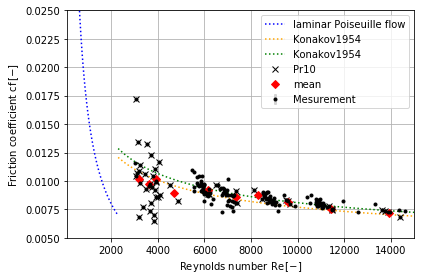

In [13]:
plt.xlim(100,15000)
plt.ylim(0.005,0.0250)
plt.plot(Re_lam, Cf_lam, color='blue',linestyle="dotted", label='laminar Poiseuille flow')
plt.plot(Re_turb, Cf_Konakov, color='orange',linestyle="dotted", label="Konakov1954")
plt.plot(Re_turb, Cf_Petukhov, color='green',linestyle="dotted", label="Konakov1954")

plt.errorbar(Re_m_07082019A_list, cf_M_07082019A_list, fmt='x', color='black', ecolor='lightgray', elinewidth=3, capsize=1, label="Pr10")
plt.errorbar(data07082019A_ave[6], data07082019A_ave[12], fmt='D', color='red', ecolor='lightgray', elinewidth=3, capsize=1, label="mean")
plt.errorbar(Re_m_07082019B_list, cf_M_07082019B_list, fmt='x', color='black', ecolor='lightgray', elinewidth=3, capsize=1)
plt.errorbar(data07082019B_ave[6], data07082019B_ave[12], fmt='D', color='red', ecolor='lightgray', elinewidth=3, capsize=1)

plt.errorbar(Re_m_08082019A_list, cf_M_08082019A_list, fmt='x', color='black', ecolor='lightgray', elinewidth=3, capsize=1)
plt.errorbar(data08082019A_ave[6], data08082019A_ave[12], fmt='D', color='red', ecolor='lightgray', elinewidth=3, capsize=1)
plt.errorbar(Re_m_08082019B_list, cf_M_08082019B_list, fmt='x', color='black', ecolor='lightgray', elinewidth=3, capsize=1)
plt.errorbar(data08082019B_ave[6], data08082019B_ave[12], fmt='D', color='red', ecolor='lightgray', elinewidth=3, capsize=1)

plt.errorbar(Re_m_13082019A_list, cf_M_13082019A_list, fmt='x', color='black', ecolor='lightgray', elinewidth=3, capsize=1)
plt.errorbar(data13082019A_ave[6], data13082019A_ave[12], fmt='D', color='red', ecolor='lightgray', elinewidth=3, capsize=1)
plt.errorbar(Re_m_13082019B_list, cf_M_13082019B_list, fmt='x', color='black', ecolor='lightgray', elinewidth=3, capsize=1)
plt.errorbar(data13082019B_ave[6], data13082019B_ave[12], fmt='D', color='red', ecolor='lightgray', elinewidth=3, capsize=1)
plt.errorbar(Re_m_13082019C_list, cf_M_13082019C_list, fmt='x', color='black', ecolor='lightgray', elinewidth=3, capsize=1)
plt.errorbar(data13082019C_ave[6], data13082019C_ave[12], fmt='D', color='red', ecolor='lightgray', elinewidth=3, capsize=1)

plt.errorbar(Re_m_14082019A_list, cf_M_14082019A_list, fmt='x', color='black', ecolor='lightgray', elinewidth=3, capsize=1)
plt.errorbar(data14082019A_ave[6], data14082019A_ave[12], fmt='D', color='red', ecolor='lightgray', elinewidth=3, capsize=1)
plt.errorbar(Re_m_14082019B_list, cf_M_14082019B_list, fmt='x', color='black', ecolor='lightgray', elinewidth=3, capsize=1)
plt.errorbar(data14082019B_ave[6], data14082019B_ave[12], fmt='D', color='red', ecolor='lightgray', elinewidth=3, capsize=1)
plt.errorbar(Re_m_14082019C_list, cf_M_14082019C_list, fmt='x', color='black', ecolor='lightgray', elinewidth=3, capsize=1)
plt.errorbar(data14082019C_ave[6], data14082019C_ave[12], fmt='D', color='red', ecolor='lightgray', elinewidth=3, capsize=1)

plt.errorbar(Re_m_list, cf_M_list, delta_cf_M_list, fmt='.', color='black', ecolor='lightgray', elinewidth=3, capsize=1, label="Mesurement")

plt.grid(True)
plt.legend()
plt.xlabel(r'Reynolds number Re$\,\mathrm{[-]}$')
plt.ylabel(r'Friction coefficient cf$\,\mathrm{[-]}$')

OutPutFig = './recf_pr10.pdf'
plt.tight_layout()
plt.savefig(OutPutFig)
print('File name:', OutPutFig)

In [20]:
# Re_lam = np.linspace(1,2300,)
Re_tran = np.linspace(2300,10000,)
Re_turb = np.linspace(2300,100000,)
#laminar
Nu_lam1 = 3.66
Nu_lam2 = 0.7
Nu_lam3 = 1.615 * (Re_lam * Pr_correlation * di / L)**(1/3)
Nu_lam = (Nu_lam1**3 + Nu_lam2**3 + Nu_lam3**3)**(1/3)
#turbulent
xi_Kon = (0.79 * np.log10(Re_turb) - 1.64)**(-2)#Konakov
xi_Pet = (1.8 * np.log10(Re_turb) - 1.5)**(-2)#Petukhov
Nu_turb_Pet = ((xi_Pet/8 * Re_turb * Pr_correlation) / (1 + 12.7 * (xi_Pet/8)**0.5 * (Pr_correlation**(2/3) - 1))) * (1 + (di/L)**(2/3))
Nu_turb_Gni = ((xi_Pet/8 * Re_turb * Pr_correlation) / (1 + 12.7 * (xi_Pet/8)**0.5 * (Pr_correlation**(2/3) - 1))) *(Pr_m_ave/Pr_w_ave)**0.11
#transitional
c1 = Nu_lam[49]
c2 = 102.73332608586581#Nu_turb_Pet[0]
r = (Re_tran - 2300) / (10**4 - 2300)
Nu_tran = (1 - r) * c1 + r * c2

#Dittus_Boelter correlation
NuDB = 0.027*Re_turb**0.8 * Pr_correlation**0.4
#Entrance factor
entrance_section = 1.2
n = 2.08E-6 * Re_turb - 0.815
Nu_entrance = 1 + 23.99 * Re_turb **(-0.23) * (entrance_section / di)**n
#Roughness factor
epcylon = 3.2E-6 #assumed
Nu_roughness = 0.091 * (epcylon / di)**(-0.125) * Re_turb**(0.363*(epcylon/di)**0.1)
#Viscosity factor
Nu_viscosity = (mu_m_ave / mu_w_ave)**0.14
#Combining the four factors
Nu_Robinson = NuDB * Nu_entrance * Nu_roughness * Nu_viscosity
print('102.73332608586581')

102.73332608586581


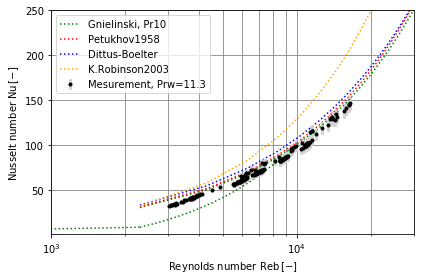

In [24]:
plt.xlim(1000,30000)
plt.ylim(1,250)
#Emperical correlation
plt.semilogx(Re_lam, Nu_lam, color='green',linestyle="dotted", label="Gnielinski, Pr10")
plt.semilogx(Re_tran, Nu_tran, color='green',linestyle="dotted")
plt.semilogx(Re_turb, Nu_turb_Gni, color='green',linestyle="dotted")
plt.semilogx(Re_turb, Nu_turb_Pet, color='red',linestyle="dotted", label="Petukhov1958")
plt.semilogx(Re_turb, NuDB, color='blue',linestyle="dotted", label="Dittus-Boelter")
plt.semilogx(Re_turb, Nu_Robinson, color='orange',linestyle="dotted", label="K.Robinson2003")
#Literature
filename_pr10 = './Bertsche2016_pr10.dot.csv'
#data_pr10 = np.array(pd.read_csv(filename_pr10, header=None))
#Re_pr10 = data_pr10[:,0]
#Nu_pr10 = data_pr10[:,1]
#plt.errorbar(Re_pr10, Nu_pr10, fmt='.', color='red', elinewidth=3, capsize=1, label="Bertsche2016, Prm10")
#Measurement 
plt.errorbar(Re_m_list, NuMessung_list, delta_NuMessung_list, fmt='.', color='black', ecolor='lightgray', elinewidth=3, capsize=1, label="Mesurement, Prw=11.3")

#plt.grid(True)
plt.grid(True,color='gray', which="both", axis='both', ls="-")
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.grid.html

plt.xlabel(r'Reynolds number Reb$\,\mathrm{[-]}$')
plt.ylabel(r'Nusselt number Nu$\,\mathrm{[-]}$')
plt.legend(loc='upper left')
plt.rcParams["font.size"] = 10

OutPutFig = './renu_pr10.pdf'
plt.tight_layout()
plt.savefig(OutPutFig)

In [ ]:
#Measurement 
plt.errorbar(ReTau_list, NuMessung_list, fmt='.', color='black', ecolor='lightgray', elinewidth=3, capsize=1, label="Mesurement, Pr11.3")
plt.errorbar(ReTau_list, Nu_turb_Gni4Tau_list, fmt='.', color='red', ecolor='lightgray', elinewidth=3, capsize=1, label="Mesurement, Pr11.3")

plt.xlabel(r'Reynolds number ReTau$\,\mathrm{[-]}$')
plt.ylabel(r'Nusselt number Nu$\,\mathrm{[-]}$')

In [ ]:
def calculate_mean(data):
    s = sum(data)
    N = len(data)
    mean =s/N
    return mean

#平均からの偏差を求める
def find_difference(data):
    mean = calculate_mean(data)
    diff = []
    for num in data:
        diff.append(num-mean)
    return diff

def calculate_variance(data):
    diff = find_difference(data)
    #差の２乗を求める
    squared_diff = []
    for d in diff:
        squared_diff.append(d**2)
    #分散を求める
    sum_squared_diff = sum(squared_diff)
    variance = sum_squared_diff/len(data)
    return variance

In [ ]:
variance = calculate_variance(cf_M_14082019A_list)
std = variance**0.5
print(std)